In [1]:
# for pep-8
!pip install nb_black
!pip install pycodestyle_magic
!pip install pycodestyle
!pip install flake8

In [2]:
%load_ext nb_black
%load_ext pycodestyle_magic

<IPython.core.display.Javascript object>

In [3]:
!pip install gdown

<IPython.core.display.Javascript object>

In [4]:
!pip install pandas numpy seaborn sklearn

<IPython.core.display.Javascript object>

In [5]:
!pip install tensorflow

  Using cached flatbuffers-22.10.26-py2.py3-none-any.whl (26 kB)
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf2onnx 1.12.1 requires flatbuffers~=1.12, but you have flatbuffers 22.10.26 which is incompatible.


<IPython.core.display.Javascript object>

In [6]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

Python implementation: CPython
Python version       : 3.8.0
IPython version      : 8.3.0

numpy       : 1.22.3
pandas      : 1.4.3
torch       : 1.11.0+cu113
transformers: 4.21.0



<IPython.core.display.Javascript object>

In [7]:
import numpy as np
import time
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.preprocessing import LabelEncoder
import tensorflow_hub as hub
import json
import os
import zipfile

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

register_matplotlib_converters()
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

HAPPY_COLORS_PALETTE = [
    "#01BEFE",
    "#FFDD00",
    "#FF7D00",
    "#FF006D",
    "#ADFF02",
    "#8F00FF",
]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams["figure.figsize"] = 12, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

2022-11-20 22:39:50.558309: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-20 22:39:50.817869: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-20 22:39:51.513457: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.7/lib64:
2022-11-20 22:39:51.513663: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

<IPython.core.display.Javascript object>

# Download Universal Text Encoder


In [8]:
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

2022-11-20 22:44:15.538055: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 22:44:15.621200: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 22:44:15.621410: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 22:44:15.621856: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

<IPython.core.display.Javascript object>

2022-11-20 22:44:22.172097: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 22:44:23.258739: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


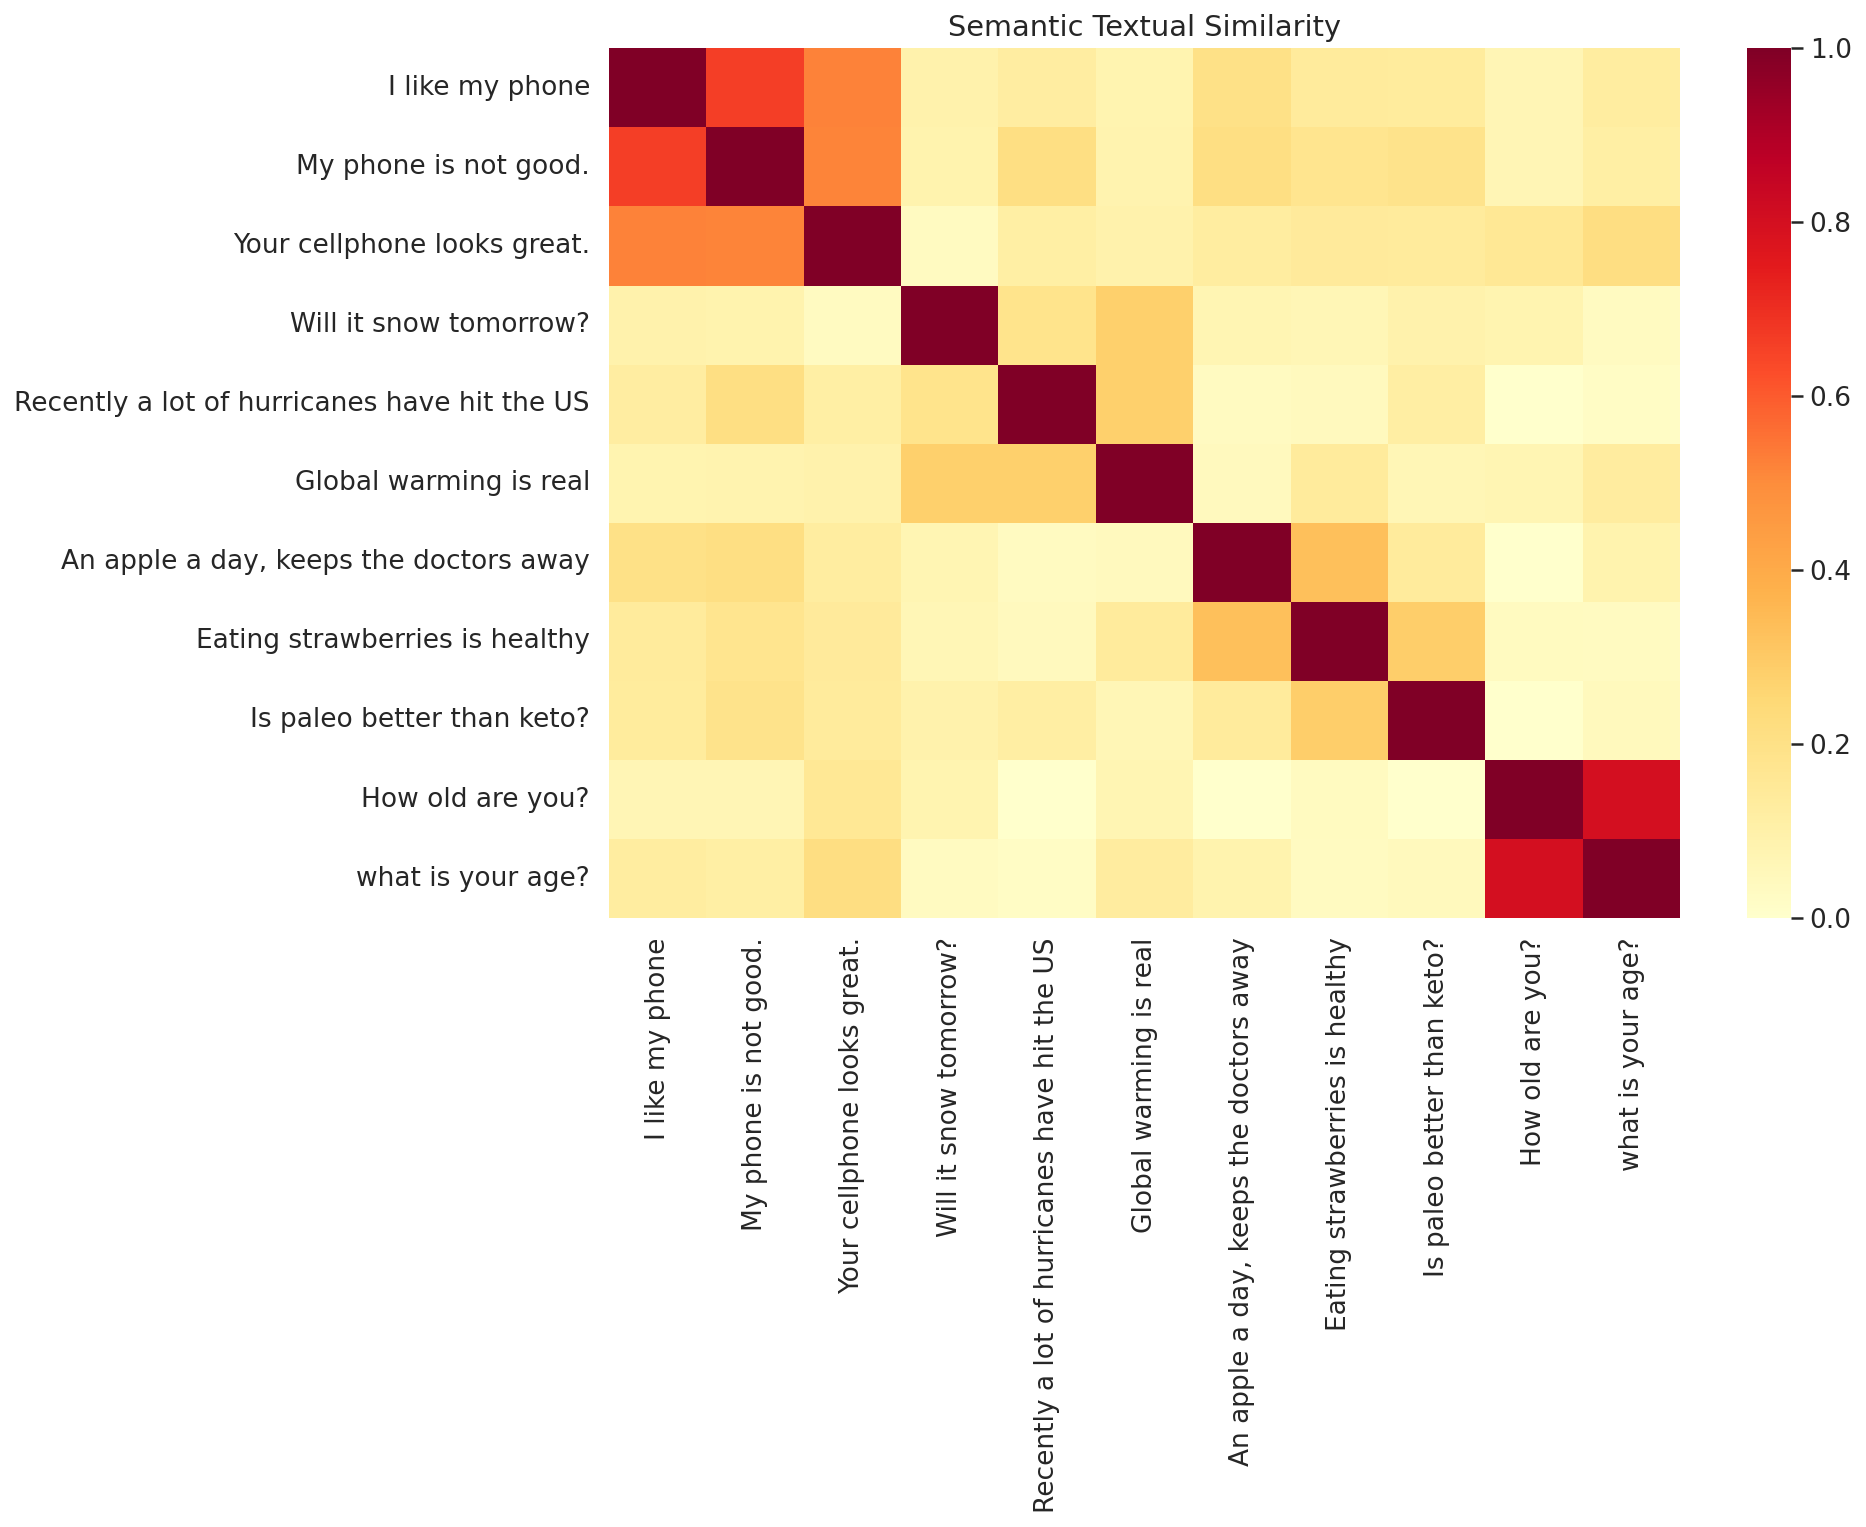

<IPython.core.display.Javascript object>

In [9]:
def embed(input):
    return use(input)


def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
        corr, xticklabels=labels, yticklabels=labels, vmin=0, vmax=1, cmap="YlOrRd"
    )
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")


def run_and_plot(messages_):
    message_embeddings_ = embed(messages_)
    plot_similarity(messages_, message_embeddings_, 90)


messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",
    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",
    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",
    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)

# Data Exploration
I'm using the public dataset Financial PhraseBank (https://arxiv.org/abs/1307.5336).
It consists of 4845 english sentences selected randomly from financial news, labeled according to how the information contained might affect the mentioned company stock price: positive, negative or neutral.


## Download the dataset

In [10]:
df = pd.read_csv("data_light/financial_news_dataset/financial_news_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data_light/financial_news_dataset/financial_news_data.csv'

<IPython.core.display.Javascript object>

In [ ]:
df.columns = ["sentiment", "statement", "0", "1"]

In [ ]:
df = df.rename(
    columns={
        "neutral": "sentiment",
        "According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .": "statement",
    }
)

In [ ]:
df.columns

In [ ]:
df = df[["sentiment", "statement"]]

In [ ]:
df.head()

In [ ]:
df.info()

We have about 4845 examples. Let's check for missing values:

Great, no missing values in the score and review texts!

In [ ]:
sns.countplot(x="sentiment", data=df)
plt.xlabel("sentiment")

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)

In [ ]:
one_hot_enc = enc.fit_transform(df.sentiment.to_numpy().reshape(-1, 1))

In [ ]:
one_hot_enc[:10]

In [ ]:
enc.categories_

In [ ]:
enc.inverse_transform(one_hot_enc[:10])

In [ ]:
positive = [0, 0, 1]
negative = [1, 0, 0]
neutral = [0, 1, 0]

In [ ]:
train_reviews, test_reviews, y_train, y_test = train_test_split(
    df.statement, one_hot_enc, test_size=0.2, random_state=RANDOM_SEED
)

In [ ]:
X_train = []
for r in tqdm(train_reviews):
    emb = use([r])
    review_emb = tf.reshape(emb, [-1]).numpy()
    X_train.append(review_emb)

X_train = np.array(X_train)

In [ ]:
X_test = []
for r in tqdm(test_reviews):
    emb = use([r])
    review_emb = tf.reshape(emb, [-1]).numpy()
    X_test.append(review_emb)

X_test = np.array(X_test)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
model = keras.Sequential()

model.add(
    keras.layers.Dense(units=256, input_shape=(X_train.shape[1],), activation="relu")
)
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(units=128, activation="relu"))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(3, activation="softmax"))
model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(0.0001),
    metrics=["accuracy"],
)
model.summary()

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    shuffle=True,
)

In [ ]:
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")
plt.legend()

In [ ]:
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="val accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

# Don't want to wait? Uncomment the next cell and download my pre-trained model:

In [ ]:
# from tensorflow.keras.models import load_model
# path = "data"
# file_name = "data/saved_models_use"
# if os.path.exists(file_name):
#     pass
# else:
#     isExist = os.path.exists(path)
#     if not isExist:

#         # Create a new directory because it does not exist
#         os.makedirs(path)
#         print("The new directory is created!")
#     !gdown  -O 'data/saved_models_use.zip' 1r2HWXpwJmoQcIqnEgJ7jKeQkuICpGaGE
#     with zipfile.ZipFile("data/saved_models_use.zip", "r") as zip_ref:
#         zip_ref.extractall("data")

In [ ]:
model.evaluate(X_test, y_test)[1]

In [ ]:
path = "data/saved_models_use"
if os.path.exists(path):
    pass
else:
    isExist = os.path.exists(path)
    if not isExist:

        # Create a new directory because it does not exist
        os.makedirs(path)
        print("The new directory is created!")

In [ ]:
model.save("data/saved_models_use")
print("Saved model to disk")

# Prediction on Raw Text

In [ ]:
# load model
model = load_model("data/saved_models_use")
# summarize model.
model.summary()

In [ ]:
test = "However , the rapidly increasing costs and the strengthening of the euro were challenging for the whole industry , and they impacted on our results."
emb = use([test])

result = model.predict(emb)

In [ ]:
result

In [ ]:
positive = [0, 0, 1]
negative = [1, 0, 0]
neutral = [0, 1, 0]

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
class_names = ["negative", "neutral", "positive"]

In [ ]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha="right")
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha="right")
    plt.ylabel("True sentiment")
    plt.xlabel("Predicted sentiment")


cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [ ]:
list_test = df["statement"].tolist()

In [ ]:
%%time
result = []
for r in list_test:
    emb = use([r])
    pred=model.predict(emb)
    result.append(pred)